https://medium.com/diogo-menezes-borges/project-3-analytics-vidhya-hackaton-black-friday-f6c6bf3da86f

In [1]:
import os
os.chdir('C:\\Users\\Administrator\\Desktop\\Data\\BlackFriday')

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To visualize the whole grid
pd.options.display.max_columns = 999

In [125]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [127]:
data.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,2.496430,8.076707,0.957360,1.858418,0.409653,5.404270,6.735436,3.841941,9263.968713
std,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,6.215492,6.250712,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [128]:
# Check for duplicates
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print('There are ' + str(idsDupli) + ' duplicate IDs for ' + str(idsTotal) + ' total entries')

There are 544177 duplicate IDs for 550068 total entries


Age : should be treated as numerical. It presents age groups.
City_Category: We can convert this to numerical as well, with dummy variables. Should take a look at the frequency of the values.
Occupation : It seems like it has at least 16 different values, should see frequency and try to decrease this value.
Gender: There are possibly two gender, we can make this binary.
Product_ID: Should see if the string “P” means something and if there are other values.
Stay_In_Current_City_Years: We should deal with the ‘+’ symbol.
Product_Category_2 and Product_Category_3 : Have NaN values.

New variables to have in consideration:

User_Count : There are duplicate User_ID , so it would be a good idea to create a feature with number of observations of the user
Product_Count : Number of observations of the product

Organisation of our analysis
Our goal as a Data Scientist is to identify the most important variables and to define the best regression model for predicting out target variable. Hence, this analysis will be divided into five stages:
Exploratory data analysis (EDA);
Data Pre-processing;
Feature engineering;
Feature Transformation;
Modeling;
Hyperparameter tuning
Ensembling.

1. Exploratory Data Analysis (EDA)
We’ve made our first assumptions on the data and now we are ready to perform some basic data exploration and come up with some inference. Hence, the goal for this section is to take a glimpse on the data as well as any irregularities so that we can correct on the next section, Data Pre-Processing.

1.1. Univariate Analysis
To get an idea of the distribution of numerical variables, histograms are an excellent starting point. Let’s begin by generating one for Purchase, our target variable.

Text(0.5, 1.0, 'Purchase amount Distribution')

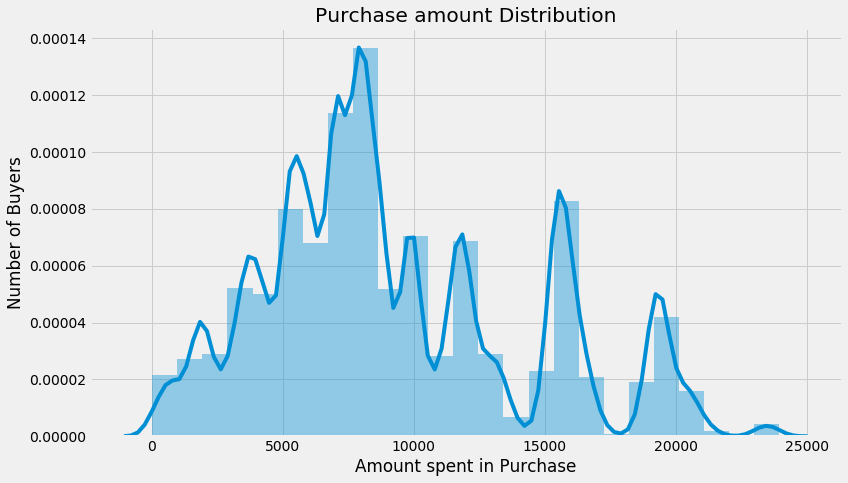

In [131]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train['Purchase'], bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [133]:
print ('Skew is:', train.Purchase.skew())
print('Kurtosis: %f' % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


1.1.2. Numerical Predictors
Now that we’ve analysed our target variable, let’s consider our predictors. Let’s start by seeing which of our features are numeric.

In [134]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

1.1.2.1. Distribution of the variable Occupation
As seen in the beginning, Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number as we did on Project Bigmart with Item_Type.

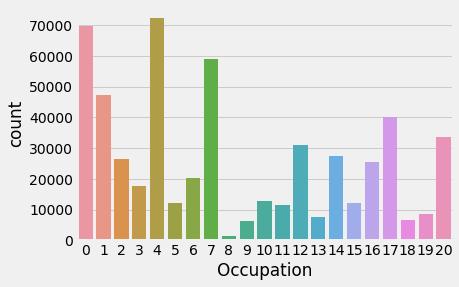

In [135]:
sns.countplot(train.Occupation)

1.1.2.2. Distribution of the variable Marital_Status
As expected there are more single people buying products on Black Friday than married people, but do they spend more?

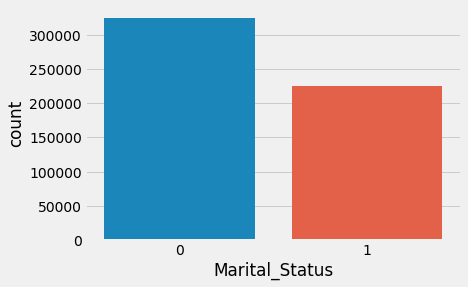

In [136]:
sns.countplot(train.Marital_Status)

1.1.2.3. Distribution of the variable Product_Category_1
From the distribution for products from category one, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents.

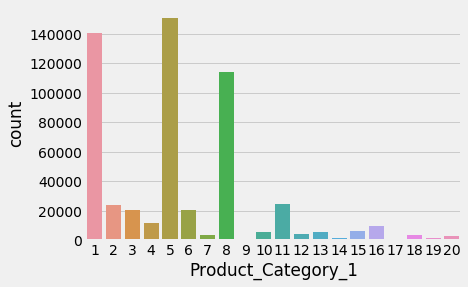

In [137]:
sns.countplot(train.Product_Category_1)

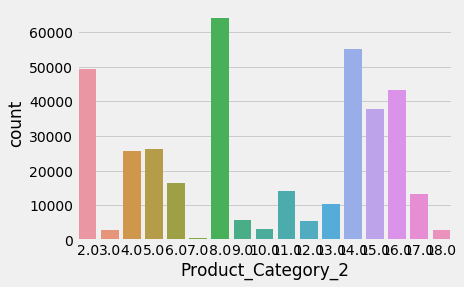

In [139]:
sns.countplot(train.Product_Category_2)

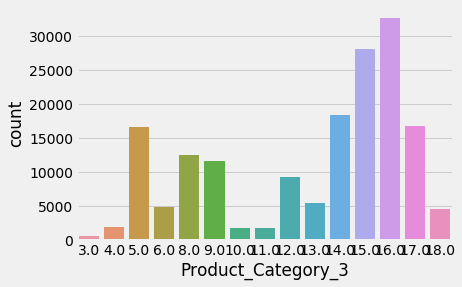

In [138]:
sns.countplot(train.Product_Category_3)

1.1.2.6. Correlation between Numerical Predictors and Target variable

In [141]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')

print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


There does not seem to be any predictor that would have a high impact on Purchase , since the highest correlation is give by Occupation with 0.0208. On the other hand, Product_Category_1 has a negative correlation with our target with the value -0.3437 which is somehow odd.

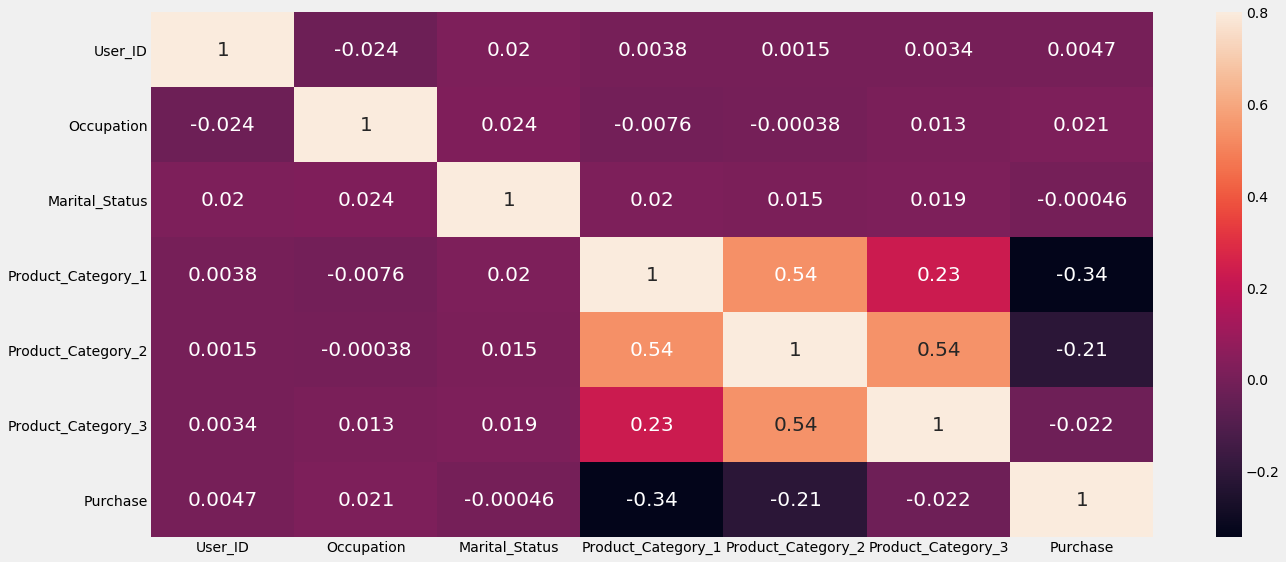

In [142]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

There seems to be no multicollinearity with our predictors which is a good thing, although there is some correlation among the product categories. Are category 2 and 3 necessary? Can we dispose them?

1.1.3. Categorical Predictors
For categorical variables, bar charts and frequency counts are the natural counterparts to histograms. Now is time to look at the variables that contain some insight on the assumptions previously made.

1.1.3.1. Distribution of the variable Gender
Most of the buyers are males, but who spends more on each purchase: man or woman?

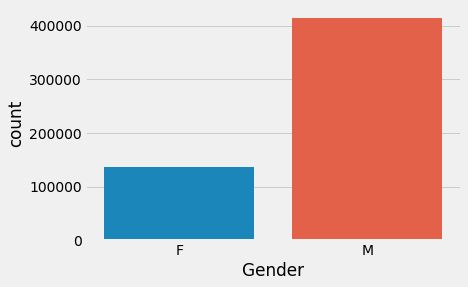

In [143]:
sns.countplot(train.Gender)

1.3.2. Distribution of the variable Age

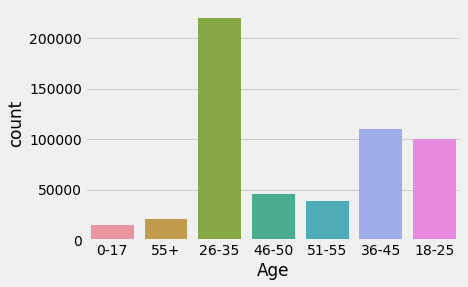

In [144]:
sns.countplot(train.Age)

As expected, most purchases are made by people between 18 to 45 years old.

1.1.3.3. Distribution of the variable City_Category
Supposing ‘A’ represents the biggest city whereas ‘C’ the smallest, it curious to see that the medium size cities ‘B’ had higher sales than the others. But do they also spent more?

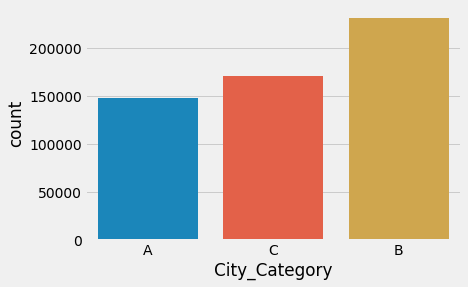

In [145]:
sns.countplot(train.City_Category)

1.1.3.3. Distribution of the variable Stay_In_Current_City_Years
The tendency looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

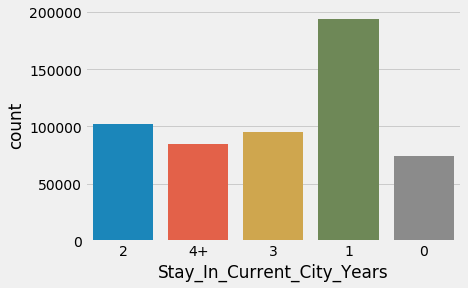

In [146]:
sns.countplot(train.Stay_In_Current_City_Years)

1.2. Bivariate Analysis
Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

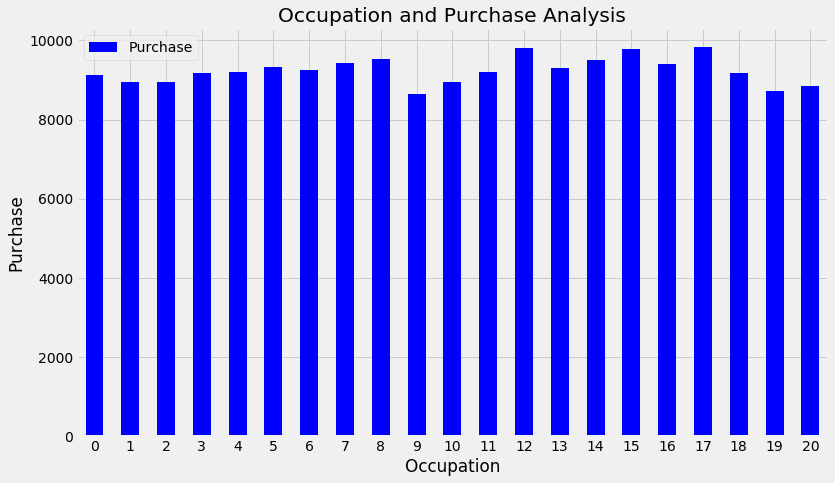

In [147]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

1.2.1.2. Marital_Status and Purchase analysis
Now, this is a interesting aspect. We had more single customers than married. However, on average an individual customer tends to spend the same amount independently if his/her is married or not. Again, if you had all the purchases the single group, since has a higher representation, will have the highest purchase values.

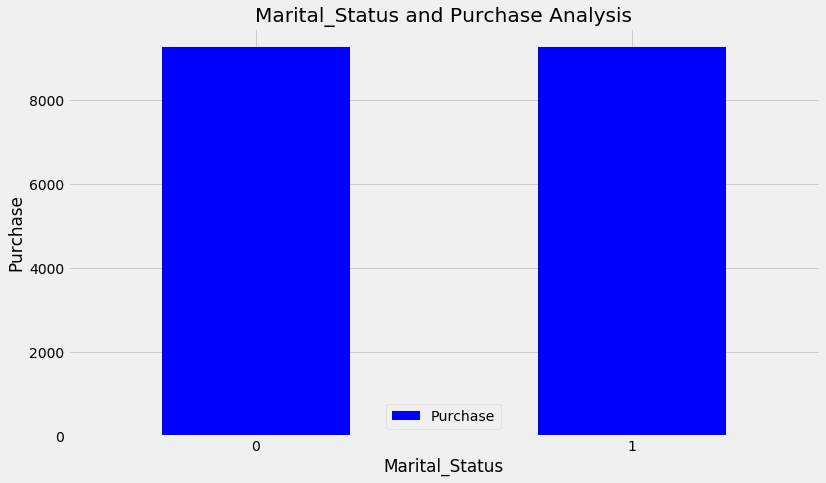

In [149]:
Marital_Status_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

1.2.1.3. Product_category_1 and Purchase analysis
If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

In [152]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


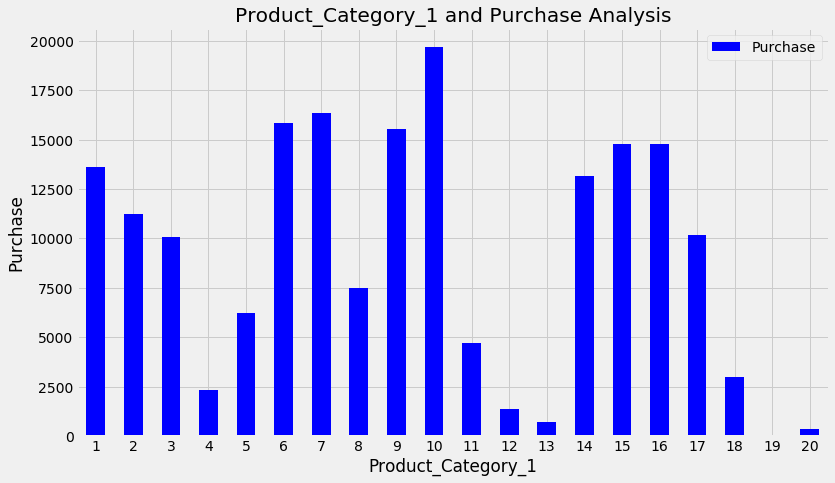

In [153]:
Product_category_1_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

For examples, if instead of the average spent we look at the amount spent on purchase, as illustrated in the chart below, that distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

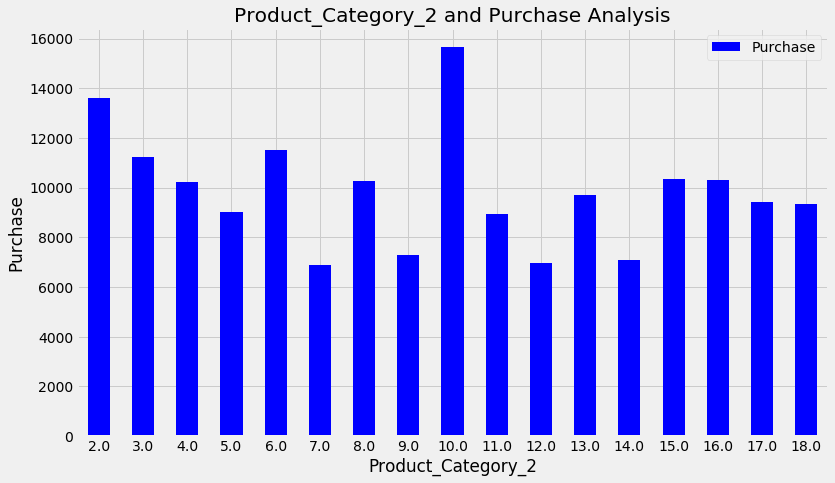

In [154]:
Product_Category_2_pivot = \
train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_Category_2_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

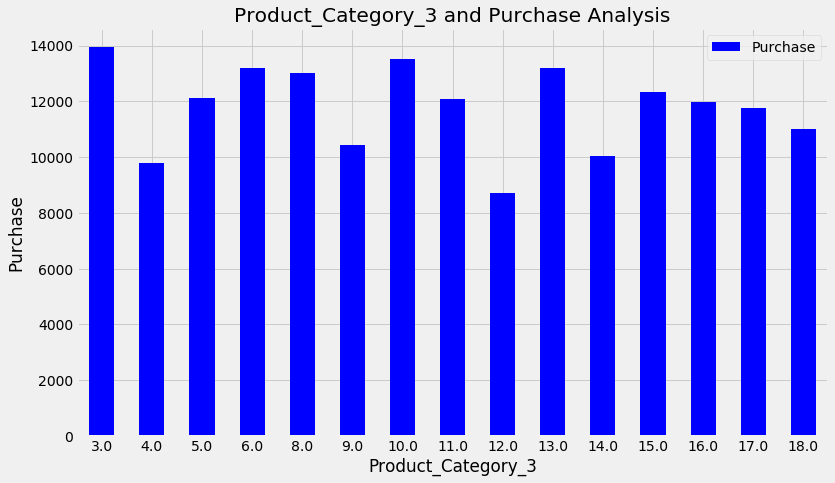

In [155]:
Product_Category_3_pivot = \
train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Product_Category_3_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

2. 1. Looking for missing values

In [156]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

The only predictors having missing value are Product_Category_1 and Product_Category_2 . We can either try to impute the missing values or drop these predictors. We can text both approaches to see which returns the best results.

2.1.1. Numerical Values
2.1.1.1. Imputing the value Zero

In [157]:
data["Product_Category_2"]= \
data["Product_Category_2"].fillna(-2.0).astype("float")
data.Product_Category_2.value_counts().sort_index()

0.0     173638
2.0      49217
3.0       2884
4.0      25677
5.0      26235
6.0      16466
7.0        626
8.0      64088
9.0       5693
10.0      3043
11.0     14134
12.0      5528
13.0     10531
14.0     55108
15.0     37855
16.0     43255
17.0     13320
18.0      2770
Name: Product_Category_2, dtype: int64

In [159]:
data['Product_Category_3']= \
data['Product_Category_3'].fillna(-2.0).astype('float')
data.Product_Category_3.value_counts().sort_index()

0.0     383247
3.0        613
4.0       1875
5.0      16658
6.0       4890
8.0      12562
9.0      11579
10.0      1726
11.0      1805
12.0      9246
13.0      5459
14.0     18428
15.0     28013
16.0     32636
17.0     16702
18.0      4629
Name: Product_Category_3, dtype: int64

2.1.1.2. Removing Product_Category_1 group 19 and 20 from Train